# Yuwanda Indra Gunawan
# 14116001

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# membaca data

In [2]:
df = pd.read_csv('winequality-white.csv', delimiter=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Inisialisasi visual

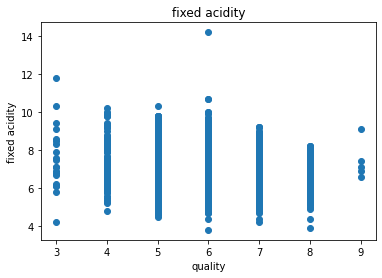

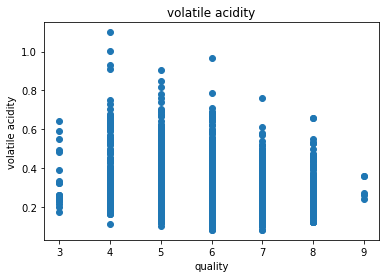

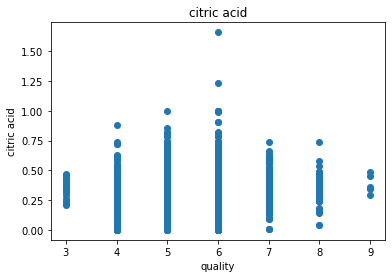

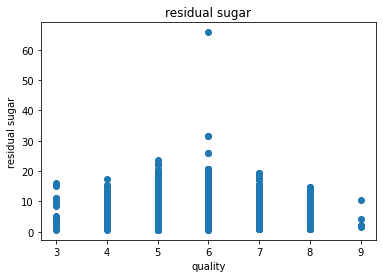

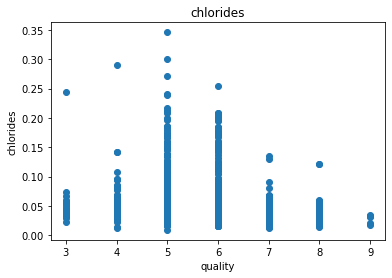

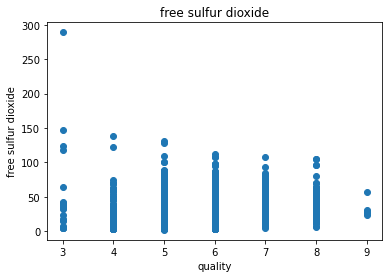

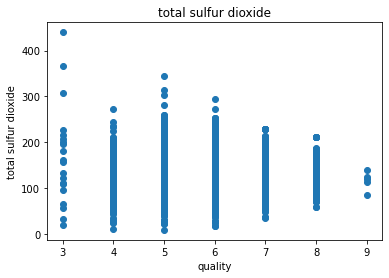

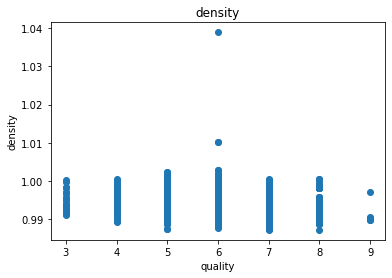

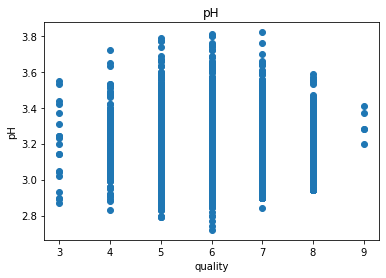

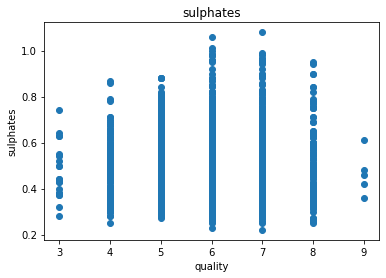

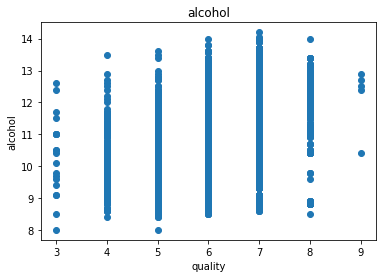

In [4]:
for label in df.columns[:-1]:
# for label in ['alcohol']:
    plt.scatter(df['quality'], df[label])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.savefig('imgs/'+'red'.join(label.split(' ')))
    plt.show()


# Mengumpulkan data latih dan pengujian

In [5]:
# Karena angka 3-9 tidak terlalu berarti, maka di deklarasikan low(0), mid(1), dan high(2)
bins = [0, 5.5, 7.5, 10] #di deklarasikan 3-5 rendah, 6-7 sedang, 8-9 tinggi
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [6]:
df['quality'].head(15)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    1
14    0
Name: quality, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [7]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
for data in [y_train, y_test]:
    print(data.describe())

count     3918
unique       3
top          1
freq      2454
Name: quality, dtype: int64
count     980
unique      3
top         1
freq      624
Name: quality, dtype: int64


# K Nearest Neighbors Classifier

In [9]:
n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(x_train, y_train)
pred_n3 = n3.predict(x_test)
print(classification_report(y_test, pred_n3))
cross_val = cross_val_score(estimator=n3, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       321
           1       0.77      0.79      0.78       624
           2       0.39      0.26      0.31        35

    accuracy                           0.72       980
   macro avg       0.60      0.56      0.57       980
weighted avg       0.71      0.72      0.71       980

0.7292016806722689


In [10]:
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(x_train, y_train)
pred_n5 = n5.predict(x_test)
print(classification_report(y_test, pred_n5))
cross_val = cross_val_score(estimator=n5, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.64      0.59      0.62       321
           1       0.76      0.82      0.79       624
           2       0.33      0.11      0.17        35

    accuracy                           0.72       980
   macro avg       0.58      0.51      0.52       980
weighted avg       0.71      0.72      0.71       980

0.7225618508272874


# Random Forest Classifier

In [11]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       321
           1       0.85      0.90      0.87       624
           2       1.00      0.43      0.60        35

    accuracy                           0.83       980
   macro avg       0.88      0.69      0.75       980
weighted avg       0.84      0.83      0.83       980

0.8044867947178872


# Decision Tree Classifier

In [12]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       321
           1       0.81      0.81      0.81       624
           2       0.38      0.49      0.42        35

    accuracy                           0.75       980
   macro avg       0.62      0.65      0.64       980
weighted avg       0.75      0.75      0.75       980

0.7365970301163943


# Stochastic Gradient Descent

In [13]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, pred_sgd))
cross_val = cross_val_score(estimator=sgd, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.69      0.25      0.37       321
           1       0.68      0.94      0.79       624
           2       0.00      0.00      0.00        35

    accuracy                           0.68       980
   macro avg       0.46      0.40      0.39       980
weighted avg       0.66      0.68      0.63       980



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7085207996241975


# Peningkatan hasil

In [17]:
# jumlah trees di random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# jumlah setiap split
max_features = ['auto', 'sqrt']
# jumlah maksimum level tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# jumlah minimum sampel yang diperlukan untuk split node
min_samples_split = [2, 5, 10]
# jumlah minimum sampel yang diperlukan pada setiap simpul
min_samples_leaf = [1, 2, 4]
# metode pemilihan sampel untuk melatih setiap tree
bootstrap = [True, False]

# random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rf_optimized = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42)


rf_optimized.fit(x_train, y_train)
pred_optimized = rf_optimized.predict(x_test)
print(classification_report(y_test, pred_optimized))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   8.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   8.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   8.3s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   5.8s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   5.7s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   5.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=6

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=472; total time=   4.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=472; total time=   4.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=472; total time=   4.3s
[CV] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=155; total time=   1.4s
[CV] END bootstrap=True, max_depth=76, max

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=366; total time=   3.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=366; total time=   3.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=366; total time=   3.7s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=65, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=261; total time=   2.6s
[CV] END bootstrap=True, max_depth=6

[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=683; total time=  10.3s
[CV] END bootstrap=False, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=683; total time=   9.5s
[CV] END bootstrap=False, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=683; total time=  10.1s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.7s
[CV] END bootstrap=True, max_depth=65,

[CV] END bootstrap=True, max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=894; total time=  11.4s
[CV] END bootstrap=True, max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=894; total time=  12.5s
[CV] END bootstrap=True, max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=894; total time=  11.6s
[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  16.0s
[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  15.5s
[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  19.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=366; total time=   5.7s
[CV] END bootstrap=True, max_depth=No

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       321
           1       0.84      0.90      0.87       624
           2       1.00      0.43      0.60        35

    accuracy                           0.83       980
   macro avg       0.88      0.69      0.74       980
weighted avg       0.83      0.83      0.82       980



In [18]:
print(classification_report(y_test, pred_optimized))
print(rf_optimized.best_params_)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       321
           1       0.84      0.90      0.87       624
           2       1.00      0.43      0.60        35

    accuracy                           0.83       980
   macro avg       0.88      0.69      0.74       980
weighted avg       0.83      0.83      0.82       980

{'n_estimators': 788, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 32, 'bootstrap': True}


In [19]:
rfeval = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
rfeval.mean()


0.8032132418184667

In [20]:
rf_optimized = RandomForestClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=None, bootstrap=True)
rf_optimized.fit(x_train, y_train)

rfeval = cross_val_score(estimator=rf_optimized, X=x_train, y=y_train, cv=10)
rfeval.mean()


0.8085736468500443